In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
silence_warnings()
import warnings
warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


16:48:22 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=821455;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=111489;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=534247;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=425888;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

16:48:23 INFO      Starting 3ML!                                                                     ]8;id=977547;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=613667;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=94724;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=53242;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=943409;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=887628;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=178297;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=623802;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

16:48:23 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=668675;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=792120;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=640583;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=427999;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

Load sub from Myspeedup: 100%|██████████| 31/31 [00:00<00:00, 91.86it/s] 

Yourlib init successfully!!!


Load sub from Myspeedup: 100%|██████████| 31/31 [00:19<00:00, 91.86it/s]

### 1.Log

In [2]:
from threeML import (
    silence_logs,
    silence_warnings,
    activate_logs,
    activate_warnings,
    update_logging_level,
)
import logging

log = logging.getLogger("threeML")
log.info("Hello there")

23:04:52 INFO      Hello there                                                                      ]8;id=914217;file:///tmp/ipykernel_25092/265651751.py\265651751.py]8;;\:]8;id=452166;file:///tmp/ipykernel_25092/265651751.py#11\11]8;;\

In [3]:
log.info("Now you see me")

# logging will be silenced
silence_logs()

log.info("Now you don't")

# now we can restore the LAST state of the logs
# before we silenced them
activate_logs()

log.info("I'm back")

23:05:02 INFO      Now you see me                                                                   ]8;id=242381;file:///tmp/ipykernel_25092/2537978581.py\2537978581.py]8;;\:]8;id=637828;file:///tmp/ipykernel_25092/2537978581.py#1\1]8;;\

         INFO      I'm back                                                                        ]8;id=459396;file:///tmp/ipykernel_25092/2537978581.py\2537978581.py]8;;\:]8;id=792115;file:///tmp/ipykernel_25092/2537978581.py#12\12]8;;\

Load sub from Myspeedup: 100%|██████████| 31/31 [00:20<00:00, 90.75it/s]

In [4]:
log.info("I am tired of")
log.warning("being warned")

# silence warnings temporarily
silence_warnings()
log.info("so I will turn off")
log.warning("all the IMPORTANT warning info")

# and bring them back
activate_warnings()
log.warning("I hope your computer didn't crash in the mean time")

23:06:01 INFO      I am tired of                                                                    ]8;id=927349;file:///tmp/ipykernel_25092/1734388436.py\1734388436.py]8;;\:]8;id=167478;file:///tmp/ipykernel_25092/1734388436.py#1\1]8;;\

         INFO      so I will turn off                                                               ]8;id=307577;file:///tmp/ipykernel_25092/1734388436.py\1734388436.py]8;;\:]8;id=203280;file:///tmp/ipykernel_25092/1734388436.py#6\6]8;;\

         WARNING   I hope your computer didn't crash in the mean time                              ]8;id=101799;file:///tmp/ipykernel_25092/1734388436.py\1734388436.py]8;;\:]8;id=601097;file:///tmp/ipykernel_25092/1734388436.py#11\11]8;;\

In [5]:
update_logging_level("DEBUG")

log.debug("Now we can see low level logging")

update_logging_level("CRITICAL")

log.info("This is invisible")

23:06:25 DEBUG     Now we can see low level logging                                                 ]8;id=568364;file:///tmp/ipykernel_25092/1207135628.py\1207135628.py]8;;\:]8;id=805388;file:///tmp/ipykernel_25092/1207135628.py#3\3]8;;\

In [7]:
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

activate_progress_bars()

for i in trange(10, desc="progressive"):
    pass

# this will turn of progress for all of 3ML
silence_progress_bars()

for i in trange(10, desc="conservative"):
    pass

# toggling the progress bar simply switches the state
toggle_progress_bars()
for i in trange(10, desc="more progress"):
    pass

progressive:   0%|          | 0/10 [00:00<?, ?it/s]

more progress:   0%|          | 0/10 [00:00<?, ?it/s]

In [8]:
from threeML import quiet_mode, loud_mode
quiet_mode()

for i in trange(10, desc="invisible"):
    pass

log.info("you will not see me")

loud_mode()

for i in trange(10, desc="visible"):
    pass

log.info("here I am")

visible:   0%|          | 0/10 [00:00<?, ?it/s]

23:07:27 INFO      here I am                                                                       ]8;id=561541;file:///tmp/ipykernel_25092/3278611814.py\3278611814.py]8;;\:]8;id=800183;file:///tmp/ipykernel_25092/3278611814.py#14\14]8;;\

### 2.Minimizer

23:13:31 INFO      set the minimizer to minuit                                             ]8;id=285468;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=984040;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

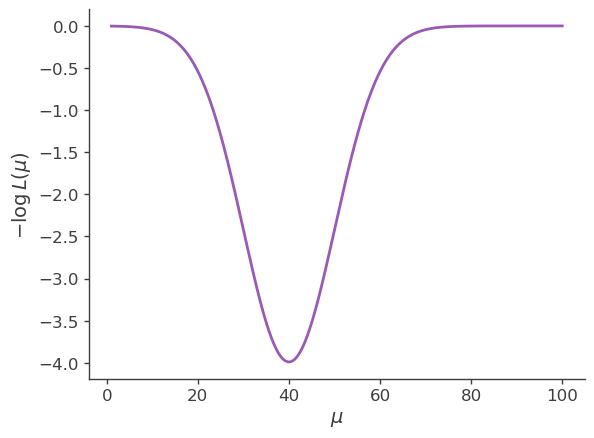

In [12]:
%matplotlib inline
from threeML.minimizer.tutorial_material import *
# This returns a JointLikelihood object with a simple likelihood function,
# and the corresponding Model instance. These objects are what you will have
# in a typical 3ML analysis. The Model contains one point source, named "test",
# with a spectrum called "simple"
jl, model = get_joint_likelihood_object_simple_likelihood()

# Let's look at the likelihood function, which in this illustrative example
# has a very simple shape
_ = plot_likelihood_function(jl)

Profiling likelihood:   0%|          | 0/10000 [00:00<?, ?it/s]

,result,unit
parameter,,
test.spectrum.main.Simple.mu,(4.0 +/- 0.5) x 10,keV


Profiling likelihood:   0%|          | 0/1000 [00:00<?, ?it/s]

([<Figure size 640x480 with 1 Axes>], ['test.spectrum.main.Simple.mu'])

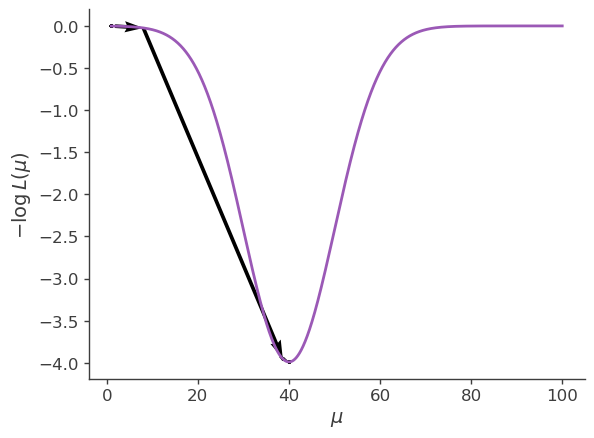

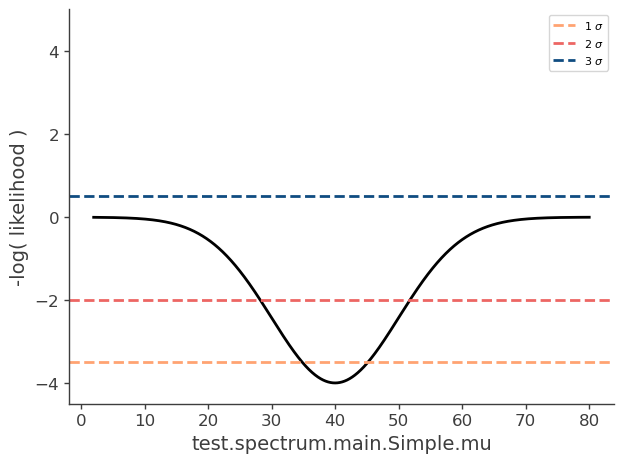

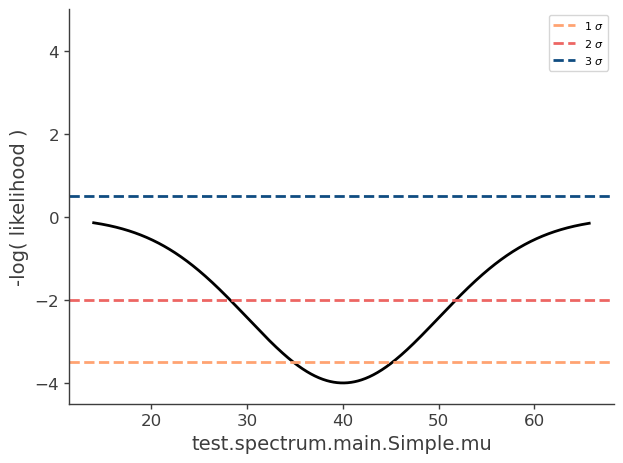

In [26]:
model.test.spectrum.main.shape.mu = 1.0

# The minuit minimizer is the default, so no setup is necessary
# quiet = True means that no result will be printed
res = jl.fit(quiet=True)

# This plots the path that Minuit has traveled looking for the minimum
# Arrows connect the different points, starting from 1.0 and going
# to 40, the minimum

fig = plot_minimizer_path(jl)
jl.get_contours("test.spectrum.main.Simple.mu",2,80,10000)
jl.plot_all_contours(1000)

23:21:57 INFO      set the minimizer to minuit                                             ]8;id=477642;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=452548;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

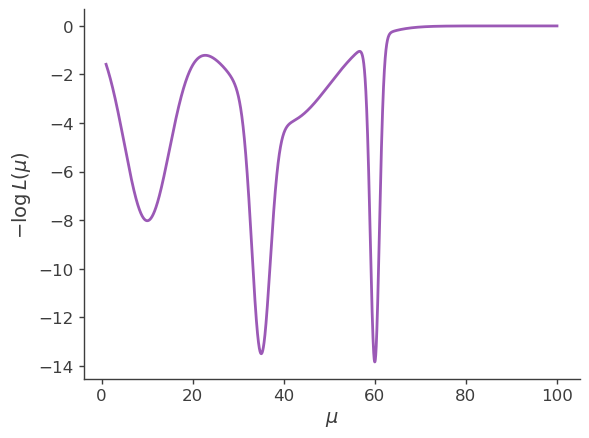

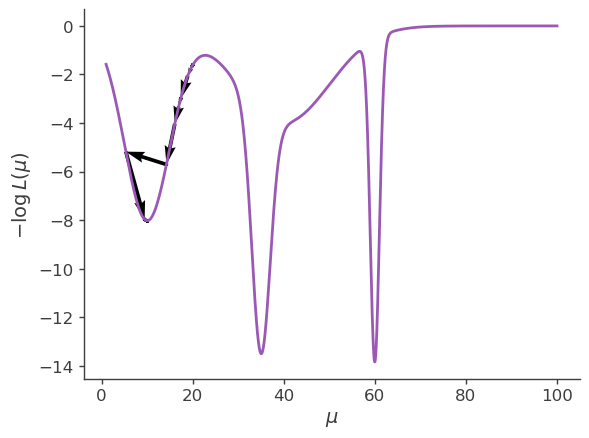

In [32]:
jl, model = get_joint_likelihood_object_complex_likelihood()

_ = plot_likelihood_function(jl)

model.test.spectrum.main.shape.mu = 20.0

res = jl.fit(quiet=True)

fig = plot_minimizer_path(jl)

23:23:12 INFO      set the minimizer to grid                                               ]8;id=165164;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=735644;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

Grid Minimization:   0%|          | 0/10 [00:00<?, ?it/s]

         INFO                                                                               ]8;id=164281;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=932015;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#294\294]8;;\
                                                                                                                   
                  Results after global minimizer (before secondary optimization):                                  

,result,unit
parameter,,
test.spectrum.main.Complex.mu,(5.9991869748000495 +/- 0) x 10,keV


         INFO                                                                               ]8;id=859208;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=965466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#300\300]8;;\
                  Total log-likelihood minimum: -13.838                                                            
                                                                                                                   

Best fit values:

,result,unit
parameter,,
test.spectrum.main.Complex.mu,(5.999 +/- 0.027) x 10,keV


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
custom,-13.838425
total,-13.838425


Values of statistical measures:

,statistical measures
AIC,-29.676849
BIC,-27.676849


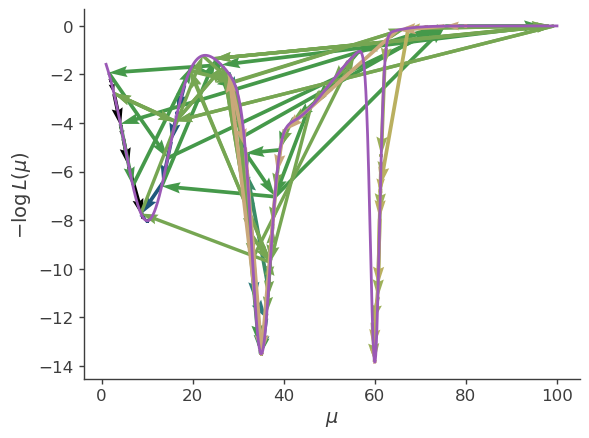

In [33]:
import numpy as np

# Create an instance of the GRID minimizer
grid_minimizer = GlobalMinimization("grid")

# Create an instance of a local minimizer, which will be used by GRID
local_minimizer = LocalMinimization("minuit")

# Define a grid for mu as 10 steps between 2 and 80
my_grid = {model.test.spectrum.main.shape.mu: np.linspace(2, 80, 10)}

# Setup the global minimization
# NOTE: the "callbacks" option is useless in a normal 3ML analysis, it is
# here only to keep track of the evolution for the plot
grid_minimizer.setup(
    second_minimization=local_minimizer, grid=my_grid, callbacks=[get_callback(jl)]
)

# Set the minimizer for the JointLikelihood object
jl.set_minimizer(grid_minimizer)

jl.fit()

fig = plot_minimizer_path(jl)

In [34]:
# Reset the parameter to a value different from the best fit found
# by previous algorithms
jl, model = get_joint_likelihood_object_complex_likelihood()
model.test.spectrum.main.shape.mu = 2.5

# Create an instance of the PAGMO minimizer
pagmo_minimizer = GlobalMinimization("pagmo")

# Select one of the many algorithms provided by pagmo
# (see https://esa.github.io/pagmo2/docs/algorithm_list.html
# for a list).
# In this case we use the Artificial Bee Colony algorithm
# (see here for a description: https://link.springer.com/article/10.1007/s10898-007-9149-x)

import pygmo

my_algorithm = pygmo.algorithm(pygmo.bee_colony(gen=20))

# Create an instance of a local minimizer
local_minimizer = LocalMinimization("minuit")

# Setup the global minimization
pagmo_minimizer.setup(
    second_minimization=local_minimizer,
    algorithm=my_algorithm,
    islands=10,
    population_size=10,
    evolution_cycles=1,
)

# Set the minimizer for the JointLikelihood object
jl.set_minimizer(pagmo_minimizer)

jl.fit()

# NOTE: given the inner working of pygmo, it is not possible
# to plot the evolution

23:23:56 INFO      set the minimizer to minuit                                             ]8;id=650307;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=944394;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to pagmo                                              ]8;id=402448;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=728278;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\


PAGMO setup:
------------
- Number of islands:            10
- Population size per island:   10
- Evolutions cycles per island: 1



pygmo minimization:   0%|          | 0/10 [00:00<?, ?it/s]


Summary of evolution:
---------------------
Best population has minimum -13.838
Worst population has minimum -13.524



23:23:57 INFO                                                                               ]8;id=402749;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=301700;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#294\294]8;;\
                                                                                                                   
                  Results after global minimizer (before secondary optimization):                                  

,result,unit
parameter,,
test.spectrum.main.Complex.mu,(5.998881714315005 +/- 0) x 10,keV


         INFO                                                                               ]8;id=856285;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=37395;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#300\300]8;;\
                  Total log-likelihood minimum: -13.838                                                            
                                                                                                                   

Best fit values:

,result,unit
parameter,,
test.spectrum.main.Complex.mu,(5.999 +/- 0.027) x 10,keV


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
custom,-13.838425
total,-13.838425


Values of statistical measures:

,statistical measures
AIC,-29.676849
BIC,-27.676849


### 3. Bayes

In [35]:
from threeML.bayesian.tutorial_material import *

23:26:26 INFO      sampler set to emcee                                                    ]8;id=796956;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=728863;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

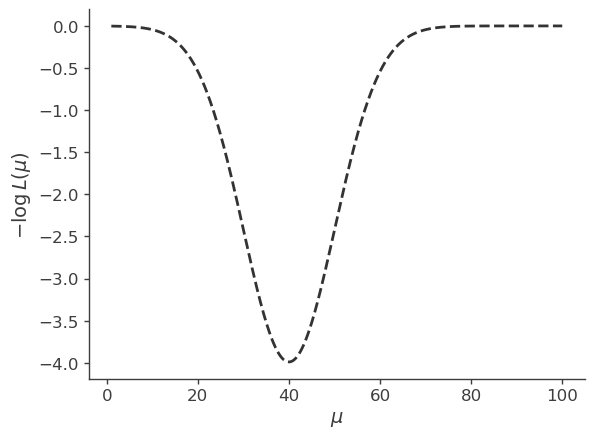

In [36]:
# This returns a BayesianAnalysis object with a simple likelihood function,
# and the corresponding Model instance. These objects are what you will have
# in a typical 3ML analysis. The Model contains one point source, named "test",
# with a spectrum called "simple"
bayes, model = get_bayesian_analysis_object_simple_likelihood()
bayes.set_sampler("emcee")
# Let's look at the likelihood function, which in this illustrative example
# has a very simple shape
_ = plot_likelihood_function(bayes)

In [37]:
model.test.spectrum.main.shape.mu.prior = Uniform_prior(
    lower_bound=1, upper_bound=100.0
)

# Alternatively, we can set an uniformative prior on the parameter's bounds
model.test.spectrum.main.shape.mu.set_uninformative_prior(Uniform_prior)

In [38]:
n_walkers = 5
burn_in = 10
n_samples = 500

bayes.sampler.setup(n_iterations=n_samples, n_burn_in=burn_in, n_walkers=n_walkers)

res = bayes.sample()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

23:28:36 INFO      Mean acceptance fraction: 0.7628                                            ]8;id=239331;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=353533;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=812341;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=387600;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=46340;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=640375;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
test.spectrum.main.Simple.mu,(4.0 -0.8 +0.7) x 10,keV


Values of -log(posterior) at the minimum:

,-log(posterior)
custom,3.989423
total,3.989423


Values of statistical measures:

,statistical measures
AIC,-9.978846
BIC,-7.978846
DIC,-3.879469
PDIC,2.033744


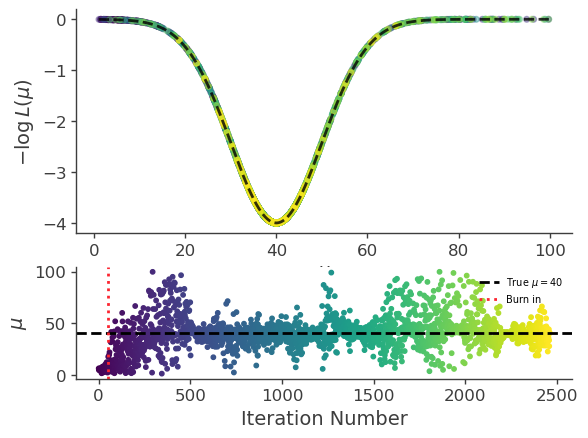

In [39]:
_ = plot_sample_path(bayes, truth=40.0, burn_in=n_walkers * burn_in)

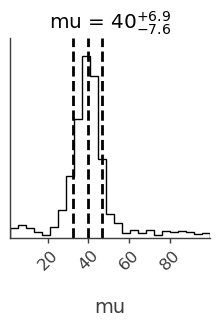

In [40]:
_ = bayes.results.corner_plot()

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

23:33:24 INFO      Mean acceptance fraction: 0.7756000000000001                                ]8;id=705135;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=64378;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=260677;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=830008;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=695649;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=331599;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
test.spectrum.main.Simple.mu,(4.0 -0.5 +1.0) x 10,keV


Values of -log(posterior) at the minimum:

,-log(posterior)
custom,3.989422
total,3.989422


Values of statistical measures:

,statistical measures
AIC,-9.978845
BIC,-7.978845
DIC,-4.460105
PDIC,1.583734


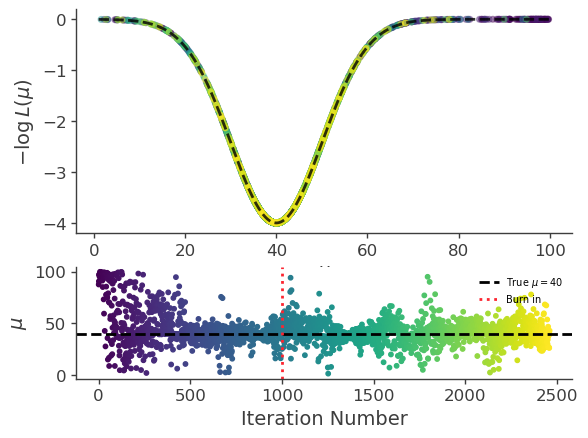

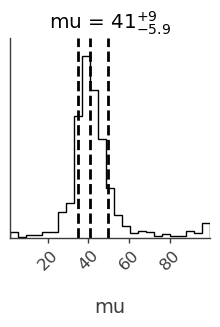

In [44]:
model.test.spectrum.main.shape.mu = 99


n_walkers = 5
burn_in = 200
n_samples = 500

res = bayes.sample()
_ = plot_sample_path(bayes, truth=40.0, burn_in=n_walkers * burn_in)
_ = bayes.results.corner_plot()

In [45]:
this_mu = bayes.results.get_variates("test.spectrum.main.Simple.mu")

print(this_mu.highest_posterior_density_interval(cl=0.68))
print(this_mu.highest_posterior_density_interval(cl=0.95))

(34.05586685739627, 48.28833342579117)
(2.6120041752386456, 71.45545974763428)


In [46]:
bayes, model = get_bayesian_analysis_object_complex_likelihood()

In [48]:
bayes.set_sampler("multinest")


model.test.spectrum.main.shape.mu.prior = Uniform_prior(lower_bound=1, upper_bound=100)

_ = plot_likelihood_function(bayes)


bayes.sampler.setup(n_live_points=400, resume=False)


res = bayes.sample()

00:18:49 ERROR     multinest is not a valid/available sampler please choose from           ]8;id=406271;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=356371;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py#185\185]8;;\
                  emcee,dynesty_nested,dynesty_dynamic                                                             

RuntimeError: 

In [49]:
bayes.set_sampler("ultranest")
bayes.sampler.setup()


res = bayes.sample(quiet=True)

00:20:20 ERROR     ultranest is not a valid/available sampler please choose from           ]8;id=137402;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=679657;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py#185\185]8;;\
                  emcee,dynesty_nested,dynesty_dynamic                                                             

RuntimeError: 

### 4.Results

00:28:25 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=921497;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=708311;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py#89\89]8;;\

00:28:26 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=981448;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=354738;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py#89\89]8;;\

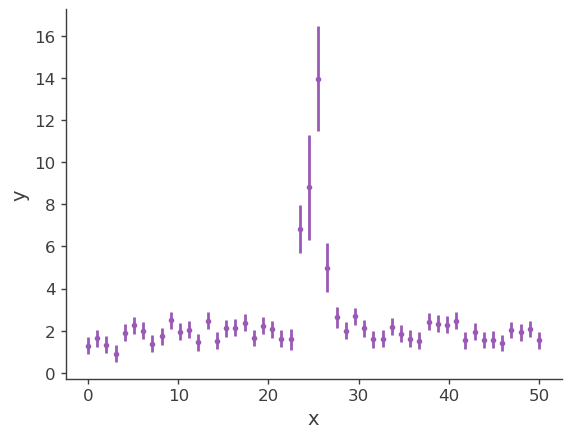

In [50]:
gen_function = Line(a=2, b=0) + Gaussian(F=30.0, mu=25.0, sigma=1)

# Generate a dataset using the line and a gaussian.
# constant 20% error

x = np.linspace(0, 50, 50)

xy = XYLike.from_function(
    "sim_data", function=gen_function, x=x, yerr=0.2 * gen_function(x)
)

fig = xy.plot()

In [51]:
fitfun = Line() + Gaussian()

fitfun.b_1.bounds = (-10, 10.0)
fitfun.a_1.bounds = (-100, 100.0)
fitfun.F_2 = 25.0
fitfun.F_2.bounds = (1e-3, 200.0)
fitfun.mu_2 = 25.0
fitfun.mu_2.bounds = (0.0, 100.0)
fitfun.sigma_2.bounds = (1e-3, 10.0)

model = Model(PointSource("fake", 0.0, 0.0, fitfun))

data = DataList(xy)

jl = JointLikelihood(model, DataList(xy))
_ = jl.fit()

00:30:37 INFO      set the minimizer to minuit                                             ]8;id=670700;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=227730;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

Best fit values:

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.79 +/- 0.11,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,(3 +/- 4) x 10^-3,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,(2.9 +/- 0.4) x 10,1 / (s cm2)
fake.spectrum.main.composite.mu_2,(2.502 +/- 0.013) x 10,keV
fake.spectrum.main.composite.sigma_2,1.01 +/- 0.09,keV


Correlation matrix:

1.00,-0.85,-0.04,0.01,-0.07
-0.85,1.00,0.00,-0.02,-0.00
-0.04,0.00,1.00,-0.05,-0.13
0.01,-0.02,-0.05,1.00,0.12
-0.07,-0.00,-0.13,0.12,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
sim_data,23.613529
total,23.613529


Values of statistical measures:

,statistical measures
AIC,58.590694
BIC,66.787172


In [52]:
jl.get_errors()

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.79 +/- 0.11,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,(3 +/- 4) x 10^-3,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,(2.9 +/- 0.4) x 10,1 / (s cm2)
fake.spectrum.main.composite.mu_2,(2.502 +/- 0.013) x 10,keV
fake.spectrum.main.composite.sigma_2,1.01 -0.09 +0.10,keV


,value,negative_error,positive_error,error,unit
fake.spectrum.main.composite.a_1,1.793734,-0.113419,0.113279,0.113349,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,0.003395,-0.003841,0.003847,0.003844,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,28.757093,-3.982492,3.986335,3.984413,1 / (s cm2)
fake.spectrum.main.composite.mu_2,25.023759,-0.126592,0.127071,0.126831,keV
fake.spectrum.main.composite.sigma_2,1.006021,-0.090122,0.095874,0.092998,keV


In [53]:
ar = jl.results
ar.display()

Best fit values:

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.79 +/- 0.11,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,(3 +/- 4) x 10^-3,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,(2.9 +/- 0.4) x 10,1 / (s cm2)
fake.spectrum.main.composite.mu_2,(2.502 +/- 0.013) x 10,keV
fake.spectrum.main.composite.sigma_2,1.01 +/- 0.09,keV


Correlation matrix:

1.00,-0.85,-0.04,0.01,-0.07
-0.85,1.00,0.00,-0.02,-0.00
-0.04,0.00,1.00,-0.05,-0.13
0.01,-0.02,-0.05,1.00,0.12
-0.07,-0.00,-0.13,0.12,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
sim_data,23.613529
total,23.613529


Values of statistical measures:

,statistical measures
AIC,58.590694
BIC,66.787172


In [54]:
ar.display("hpd")

Best fit values:

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.79 +/- 0.11,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,(3 +/- 4) x 10^-3,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,(2.9 +/- 0.4) x 10,1 / (s cm2)
fake.spectrum.main.composite.mu_2,(2.502 +/- 0.013) x 10,keV
fake.spectrum.main.composite.sigma_2,1.01 +/- 0.09,keV


Correlation matrix:

1.00,-0.85,-0.04,0.01,-0.07
-0.85,1.00,0.00,-0.02,-0.00
-0.04,0.00,1.00,-0.05,-0.13
0.01,-0.02,-0.05,1.00,0.12
-0.07,-0.00,-0.13,0.12,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
sim_data,23.613529
total,23.613529


Values of statistical measures:

,statistical measures
AIC,58.590694
BIC,66.787172


In [58]:
ar.write_to("../../data/test_mle.fits", overwrite=True)
ar_reloaded = load_analysis_results("../../data/test_mle.fits")
ar_reloaded.get_statistic_frame()
ar_reloaded.get_data_frame()

,value,negative_error,positive_error,error,unit
fake.spectrum.main.composite.a_1,1.793734,-0.112807,0.117445,0.115126,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,0.003395,-0.003862,0.003780,0.003821,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,28.757093,-4.056975,3.898048,3.977511,1 / (s cm2)
fake.spectrum.main.composite.mu_2,25.023759,-0.120419,0.126382,0.123400,keV
fake.spectrum.main.composite.sigma_2,1.006021,-0.092641,0.089267,0.090954,keV


In [60]:
from threeML.analysis_results import AnalysisResultsSet

analysis_set = AnalysisResultsSet([ar, ar_reloaded])

# index as time bins
analysis_set.set_bins("testing", [-1, 1], [3, 5], unit="s")

# write to disk
analysis_set.write_to("../../data/analysis_set_test.fits", overwrite=True)
analysis_set = load_analysis_results("../../data/analysis_set_test.fits")
analysis_set[0].display()

Best fit values:

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.79 +/- 0.11,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,(3 +/- 4) x 10^-3,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,(2.9 +/- 0.4) x 10,1 / (s cm2)
fake.spectrum.main.composite.mu_2,(2.502 +/- 0.013) x 10,keV
fake.spectrum.main.composite.sigma_2,1.01 +/- 0.09,keV


Correlation matrix:

1.00,-0.85,-0.04,0.01,-0.07
-0.85,1.00,0.00,-0.02,-0.00
-0.04,0.00,1.00,-0.05,-0.13
0.01,-0.02,-0.05,1.00,0.12
-0.07,-0.00,-0.13,0.12,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
sim_data,23.613529
total,23.613529


Values of statistical measures:

,statistical measures
AIC,58.590694
BIC,66.787172


In [61]:
p1 = ar.get_variates("fake.spectrum.main.composite.b_1")
p2 = ar.get_variates("fake.spectrum.main.composite.a_1")

print("Propagating a+b, with a and b respectively:")
print(p1)
print(p2)

print("\nThis is the result (with errors):")
res = p1 + p2
print(res)

print(res.equal_tail_interval())

Propagating a+b, with a and b respectively:
equal-tail: (3 +/- 4) x 10^-3, hpd: (3 +/- 4) x 10^-3
equal-tail: 1.79 +/- 0.11, hpd: 1.79 -0.12 +0.11

This is the result (with errors):
equal-tail: 1.80 +/- 0.11, hpd: 1.80 -0.12 +0.10
(1.6875873240805543, 1.9083256824486874)


In [ ]:
print("\nThis is 50 * a/a:")
print(50 * p1 / p1)
print("\nThis is arcsinh(b + 5*) / np.log10(b) (why not?)")
print(np.arcsinh(p1 + 5 * p2) / np.log10(p2))
print("\nRatio a/b:")
print(p2 / p1)
def my_function(x, a, b):

    return b * x**a


print("\nPropagating using a custom function:")
print(my_function(2.3, p1, p2))

In [62]:
def go(fitfun, ar, model):

    fig, ax = plt.subplots()

    # Gather the parameter variates

    arguments = {}

    for par in fitfun.parameters.values():

        if par.free:

            this_name = par.name

            this_variate = ar.get_variates(par.path)

            # Do not use more than 1000 values (would make computation too slow for nothing)

            if len(this_variate) > 1000:

                this_variate = np.random.choice(this_variate, size=1000)

            arguments[this_name] = this_variate

    # Prepare the error propagator function

    pp = ar.propagate(
        ar.optimized_model.fake.spectrum.main.shape.evaluate_at, **arguments
    )

    # You can just use it as:

    print(pp(5.0))

    # Make the plot

    energies = np.linspace(0, 50, 100)

    low_curve = np.zeros_like(energies)
    middle_curve = np.zeros_like(energies)
    hi_curve = np.zeros_like(energies)

    free_parameters = model.free_parameters

    p = tqdm(total=len(energies), desc="Propagating errors")

    with use_astromodels_memoization(False):
        for i, e in enumerate(energies):
            this_flux = pp(e)

            low_bound, hi_bound = this_flux.equal_tail_interval()

            low_curve[i], middle_curve[i], hi_curve[i] = (
                low_bound,
                this_flux.median,
                hi_bound,
            )

            p.update(1)

    ax.plot(energies, middle_curve, "--", color="black")
    ax.fill_between(energies, low_curve, hi_curve, alpha=0.5, color="blue")

equal-tail: 1.81 -0.12 +0.11, hpd: 1.81 -0.12 +0.10


Propagating errors: 100%|██████████| 100/100 [00:03<00:00, 30.27it/s]


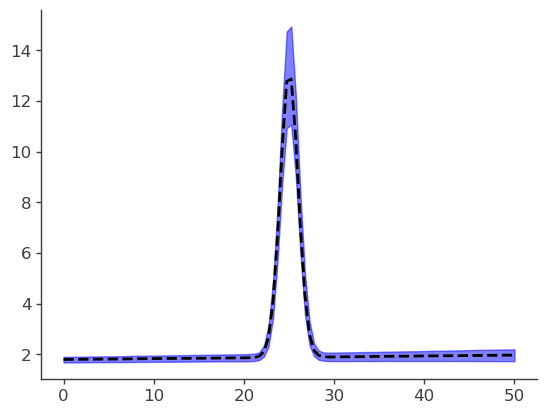

In [63]:
go(fitfun, ar, model)

In [64]:
for parameter in ar.optimized_model:

    model[parameter.path].value = parameter.value

model.fake.spectrum.main.composite.a_1.set_uninformative_prior(Uniform_prior)
model.fake.spectrum.main.composite.b_1.set_uninformative_prior(Uniform_prior)
model.fake.spectrum.main.composite.F_2.set_uninformative_prior(Log_uniform_prior)
model.fake.spectrum.main.composite.mu_2.set_uninformative_prior(Uniform_prior)
model.fake.spectrum.main.composite.sigma_2.set_uninformative_prior(Log_uniform_prior)

bs = BayesianAnalysis(model, data)
bs.set_sampler("emcee")
bs.sampler.setup(n_iterations=1000, n_burn_in=100, n_walkers=20)
samples = bs.sample()

00:47:01 INFO      sampler set to emcee                                                    ]8;id=812616;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=788198;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

00:47:05 INFO      Mean acceptance fraction: 0.48925                                           ]8;id=794838;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=872185;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/emcee_sampler.py#157\157]8;;\

00:47:06 INFO      fit restored to maximum of posterior                                         ]8;id=75451;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=37896;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=529519;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=278562;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.79 -0.11 +0.14,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,(3 +/- 4) x 10^-3,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,(2.82 -0.5 +0.34) x 10,1 / (s cm2)
fake.spectrum.main.composite.mu_2,(2.502 -0.015 +0.013) x 10,keV
fake.spectrum.main.composite.sigma_2,1.03 -0.13 +0.07,keV


Values of -log(posterior) at the minimum:

,-log(posterior)
sim_data,-27.007258
total,-27.007258


Values of statistical measures:

,statistical measures
AIC,65.378152
BIC,73.574631
DIC,43.996079
PDIC,-24.517300


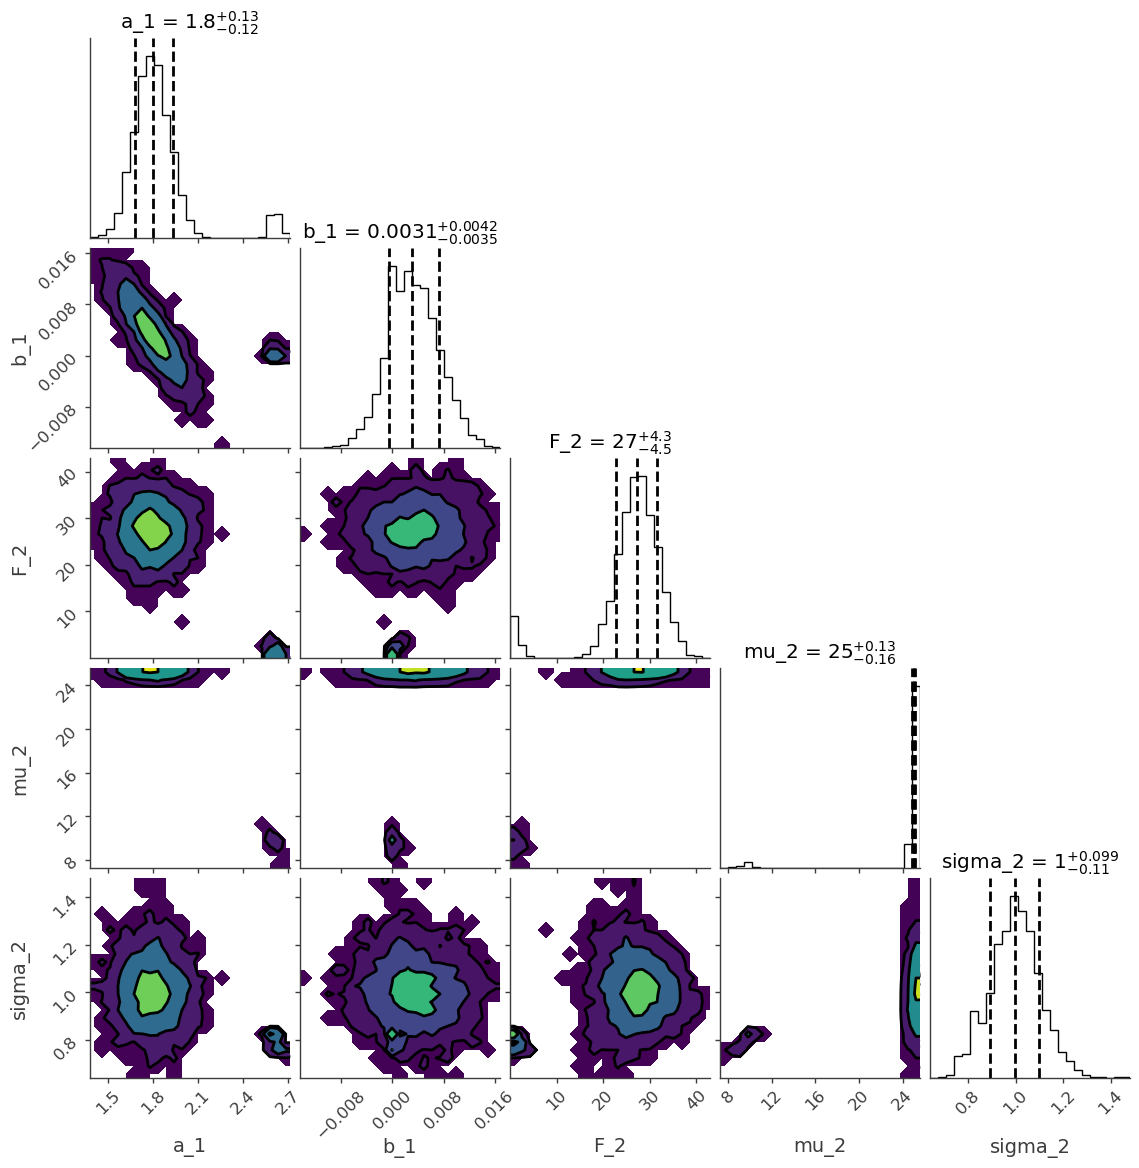

In [66]:
ar2 = bs.results
fig = ar2.corner_plot()

In [67]:
ar2.get_data_frame("equal tail")

,value,negative_error,positive_error,error,unit
fake.spectrum.main.composite.a_1,1.789288,-0.107191,0.144329,0.125760,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,0.003456,-0.003910,0.003841,0.003875,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,28.202764,-5.435233,3.391671,4.413452,1 / (s cm2)
fake.spectrum.main.composite.mu_2,25.019870,-0.153104,0.134377,0.143740,keV
fake.spectrum.main.composite.sigma_2,1.025091,-0.132966,0.072936,0.102951,keV


In [68]:
ar2.get_data_frame("hpd")

,value,negative_error,positive_error,error,unit
fake.spectrum.main.composite.a_1,1.789288,-0.114836,0.134752,0.124794,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,0.003456,-0.004188,0.003463,0.003826,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,28.202764,-5.242854,3.517343,4.380098,1 / (s cm2)
fake.spectrum.main.composite.mu_2,25.019870,-0.135113,0.146008,0.140561,keV
fake.spectrum.main.composite.sigma_2,1.025091,-0.123870,0.079301,0.101586,keV


### 5.RV

In [70]:
ar = load_analysis_results("../../data/test_mle.fits")

In [71]:
ar.display()

Best fit values:

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,1.79 +/- 0.11,1 / (keV s cm2)
fake.spectrum.main.composite.b_1,(3 +/- 4) x 10^-3,1 / (s cm2 keV2)
fake.spectrum.main.composite.F_2,(2.9 +/- 0.4) x 10,1 / (s cm2)
fake.spectrum.main.composite.mu_2,(2.502 +/- 0.013) x 10,keV
fake.spectrum.main.composite.sigma_2,1.01 +/- 0.09,keV


Correlation matrix:

1.00,-0.85,-0.04,0.01,-0.07
-0.85,1.00,0.00,-0.02,-0.00
-0.04,0.00,1.00,-0.05,-0.13
0.01,-0.02,-0.05,1.00,0.12
-0.07,-0.00,-0.13,0.12,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
sim_data,23.613529
total,23.613529


Values of statistical measures:

,statistical measures
AIC,58.590694
BIC,66.787172


In [72]:
norm = ar.get_variates("fake.spectrum.main.composite.F_2")

In [73]:
log_norm = np.log10(norm)
log_norm

equal-tail: 1.46 -0.07 +0.06, hpd: 1.46 +/- 0.06

Text(0.5, 0, 'log norm')

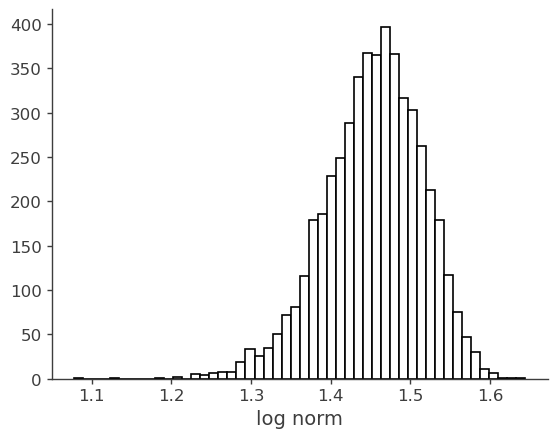

In [74]:
fig, ax = plt.subplots()

ax.hist(log_norm.samples, bins=50, ec="k", fc="w", lw=1.2)
ax.set_xlabel("log norm")

### 6.plot_spectra

23:00:41 INFO      Using Poisson log-likelihood                                                       ]8;id=349112;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=270428;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py#111\111]8;;\

         INFO      Using Poisson log-likelihood                                                       ]8;id=100635;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=165846;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py#111\111]8;;\

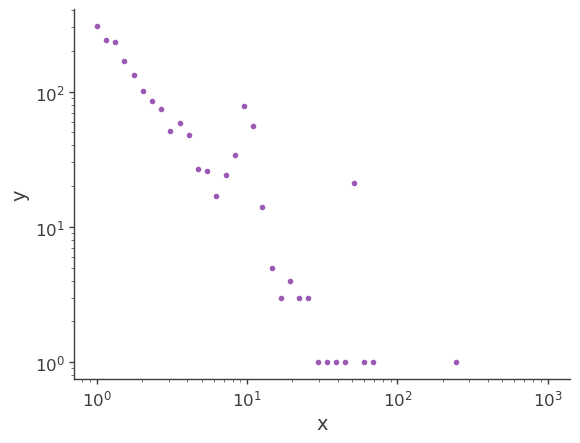

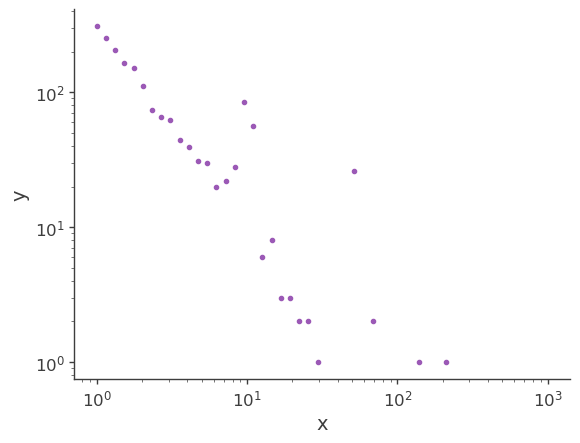

In [3]:
%matplotlib inline
p = Powerlaw(K=10, piv=10, index=-1.5)

p.K.prior = Log_uniform_prior(lower_bound=1, upper_bound=15)
p.index.prior = Uniform_prior(lower_bound=-3, upper_bound=0)

g1 = Gaussian(F=200, mu=10, sigma=1)
g1.F.prior = Log_uniform_prior(lower_bound=100, upper_bound=300)
g1.mu.prior = Log_uniform_prior(lower_bound=1, upper_bound=50)
g1.sigma.prior = Log_uniform_prior(lower_bound=0.01, upper_bound=10)

g2 = Gaussian(F=200, mu=50, sigma=1)
g2.F.prior = Log_uniform_prior(lower_bound=90, upper_bound=300)
g2.mu.prior = Log_uniform_prior(lower_bound=10, upper_bound=100)
g2.sigma.prior = Log_uniform_prior(lower_bound=0.01, upper_bound=2)

f = p + g1 + g2
x = np.logspace(0, 3, 50)

xy = XYLike.from_function("test", f, x, poisson_data=True)

fig = xy.plot(x_scale="log", y_scale="log")

ps = PointSource("test", 0, 0, spectral_shape=f)
model = Model(ps)
dl = DataList(xy)

In [4]:
bayes = BayesianAnalysis(model, dl)
bayes.set_sampler("emcee")
bayes.sampler.setup(n_burn_in=500, n_walkers=100, n_iterations=500)
bayes.sample(quiet=True)
bayes1 = bayes.results

23:00:58 INFO      sampler set to emcee                                                    ]8;id=57393;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=853403;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

23:01:20 INFO      Mean acceptance fraction: 0.2659                                            ]8;id=906310;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=152084;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/emcee_sampler.py#157\157]8;;\

23:01:27 INFO      fit restored to maximum of posterior                                         ]8;id=948817;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=538143;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=873506;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=442925;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/bayesian/sampler_base.py#178\178]8;;\

In [5]:
jl = JointLikelihood(model, dl)
jl.fit(quiet=True)
mle1 = jl.results

23:02:00 INFO      set the minimizer to minuit                                             ]8;id=981120;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=190414;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/300 [00:00<?, ?it/s]

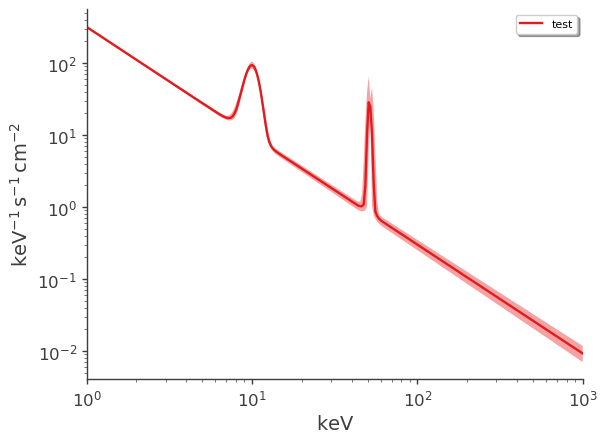

In [6]:
_ = plot_spectra(bayes1, ene_min=1, ene_max=1e3, num_ene=300)

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

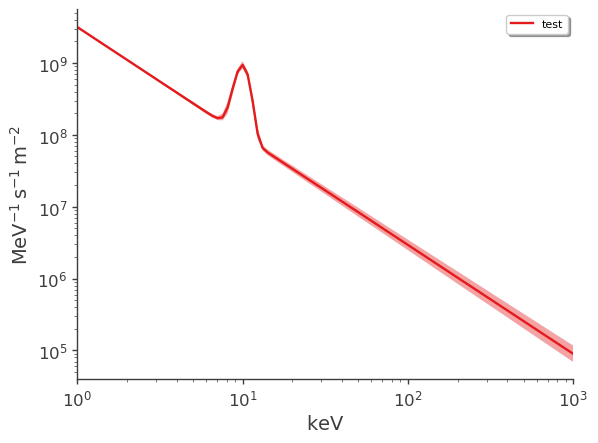

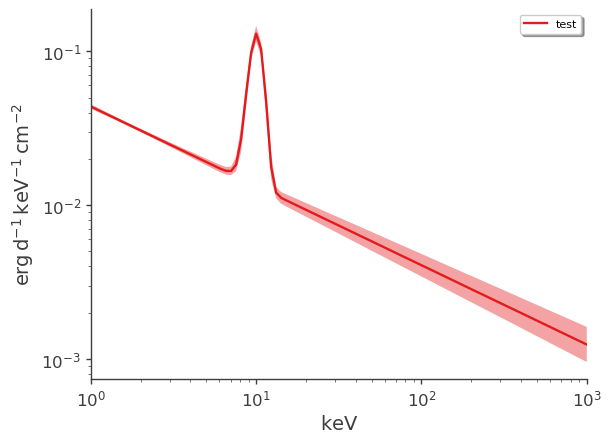

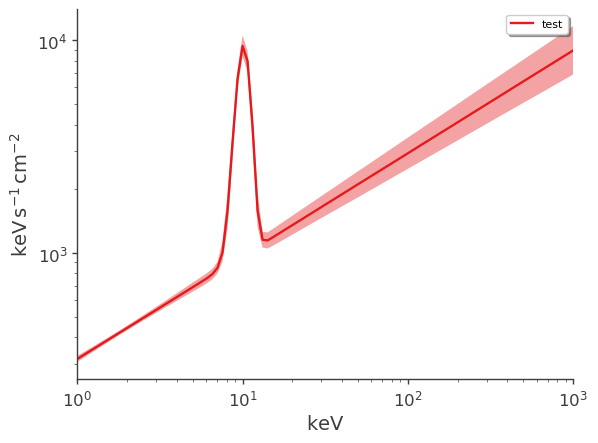

In [7]:
_ = plot_spectra(mle1, ene_min=1, ene_max=1e3, flux_unit="1/(m2 s MeV)")
_ = plot_spectra(mle1, ene_min=1, ene_max=1e3, flux_unit="erg/(cm2 day keV)")
_ = plot_spectra(mle1, ene_min=1, ene_max=1e3, flux_unit="keV2/(cm2 s keV)")

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

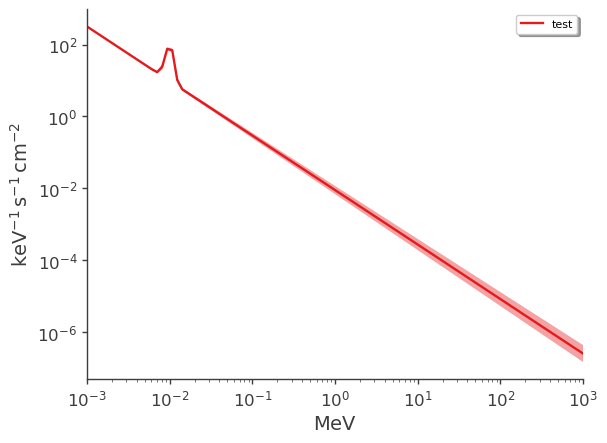

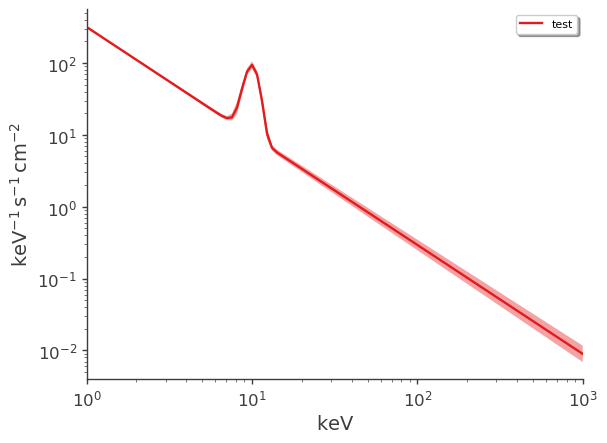

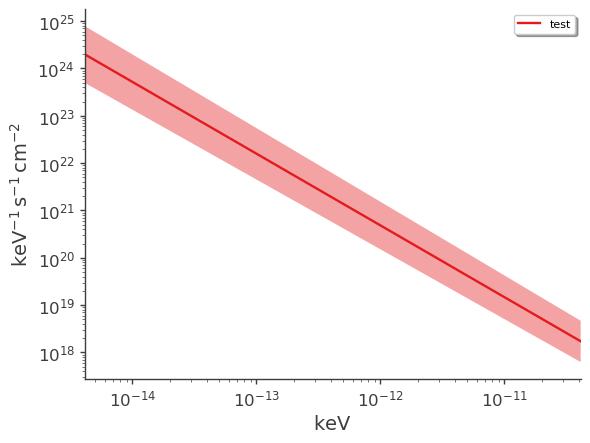

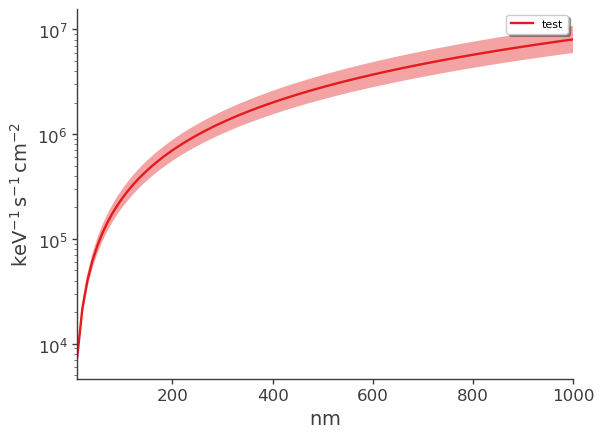

In [8]:
_ = plot_spectra(mle1, ene_min=0.001, ene_max=1e3, energy_unit="MeV")

# energy ranges can also be specified in units
_ = plot_spectra(mle1, ene_min=1 * u.keV, ene_max=1 * u.MeV)

_ = plot_spectra(mle1, ene_min=1e3 * u.Hz, ene_max=1e7 * u.Hz)

_ = plot_spectra(
    mle1, ene_min=1e1 * u.nanometer, ene_max=1e3 * u.nanometer, xscale="linear"
)  # plotting with a linear scale

processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/300 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/300 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/300 [00:00<?, ?it/s]

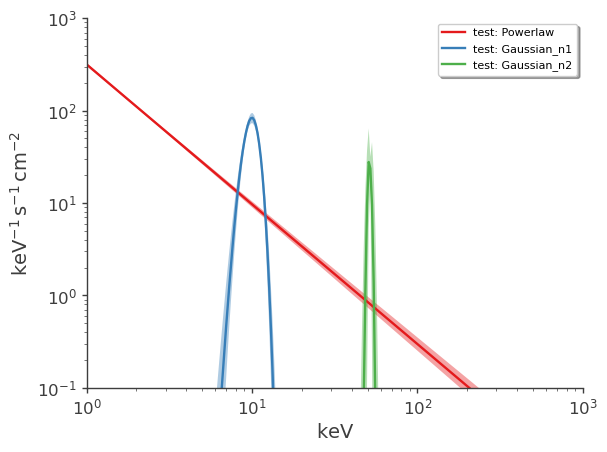

In [9]:
_ = plot_spectra(bayes1, ene_min=1, ene_max=1e3, use_components=True, num_ene=300)

_ = plt.ylim(bottom=0.1, top=1000)

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

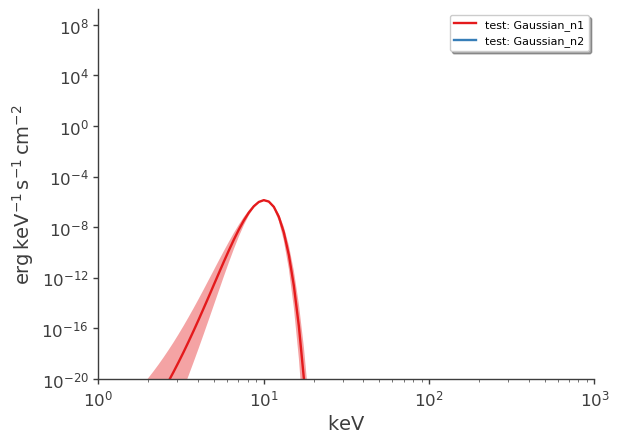

In [12]:
_ = plot_spectra(
    mle1,
    flux_unit="erg/(cm2 s keV)",
    ene_min=1,
    ene_max=1e3,
    use_components=True,
    components_to_use=["Gaussian_n1", "Gaussian_n2"],
)
_ = plt.ylim(bottom=1e-20)

processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

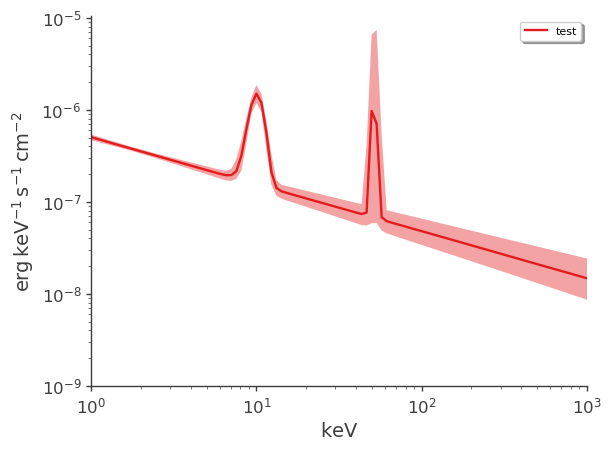

In [13]:
_ = plot_spectra(
    bayes1,
    flux_unit="erg/(cm2 s keV)",
    ene_min=1,
    ene_max=1e3,
    use_components=True,
    components_to_use=["total", "Gaussian"],
    confidence_level=0.95,
)


_ = plt.ylim(bottom=1e-9)

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

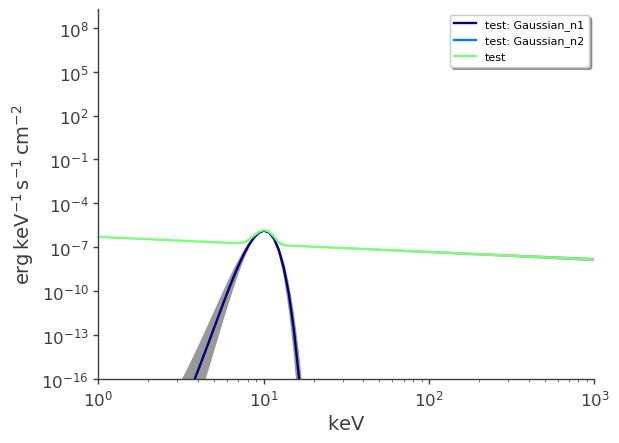

In [14]:
_ = plot_spectra(
    mle1,
    flux_unit="erg/(cm2 s keV)",
    ene_min=1,
    ene_max=1e3,
    use_components=True,
    fit_cmap="jet",  # specify a color map
    contour_colors="k",  # specify a color for all contours
    components_to_use=["total", "Gaussian_n2", "Gaussian_n1"],
)


_ = plt.ylim(bottom=1e-16)

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

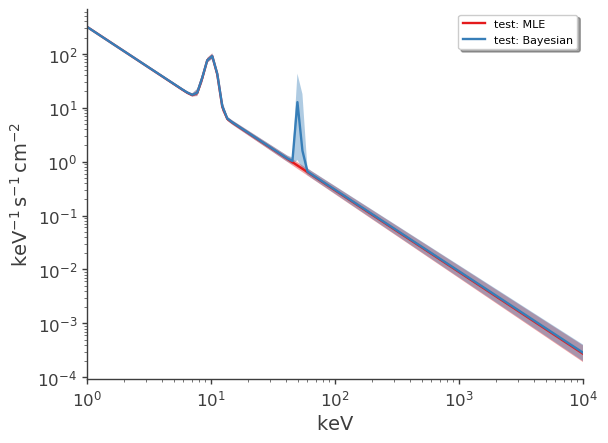

In [15]:
_ = plot_spectra(mle1, bayes1, ene_min=1)

# _=plt.ylim(bottom=1E-1)

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

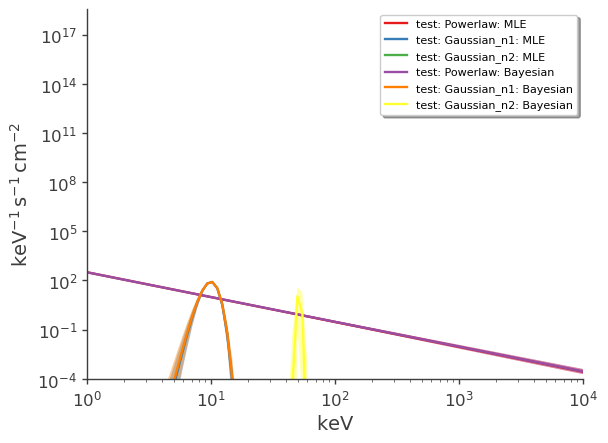

In [16]:
_ = plot_spectra(mle1, bayes1, ene_min=1.0, use_components=True)
_ = plt.ylim(bottom=1e-4)

processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

processing Bayesian analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/100 [00:00<?, ?it/s]

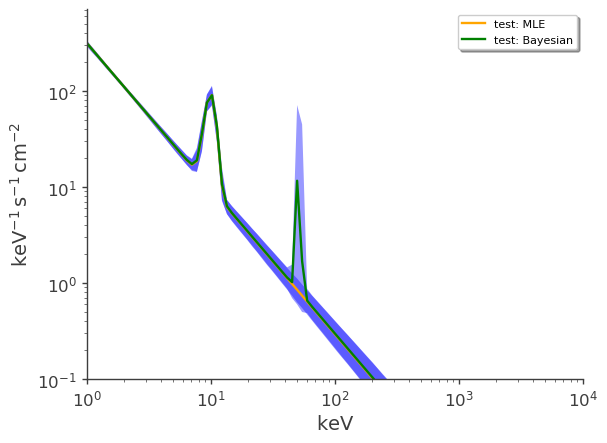

In [17]:
_ = plot_spectra(
    mle1,
    bayes1,
    ene_min=1.0,
    confidence_level=0.95,
    equal_tailed=False,
    fit_colors=["orange", "green"],
    contour_colors="blue",
)
_ = plt.ylim(bottom=1e-1)

### 3.others

In [2]:
test_source = PointSource('test_source',ra=123.22, dec=-13.56, spectral_shape=Powerlaw_flux())

my_model = Model(test_source)

In [3]:
# Get and print the differential flux at 1 keV:

differential_flux_at_1_keV = my_model.test_source(1.0)

print("Differential flux @ 1 keV : %.3f photons / ( cm2 s keV)" % differential_flux_at_1_keV)

Differential flux @ 1 keV : 1.010 photons / ( cm2 s keV)


Text(0, 0.5, 'Differential flux (ph./cm2/s/keV)')

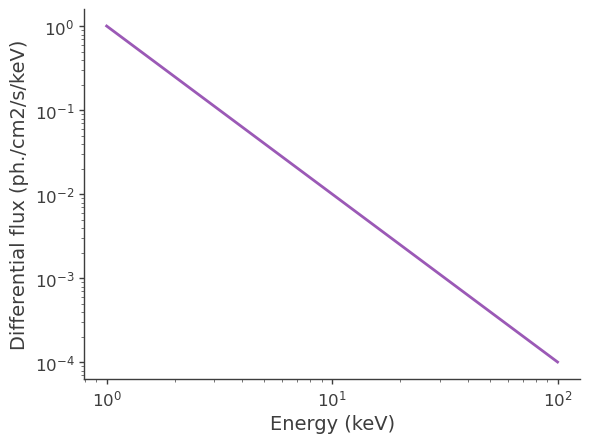

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set up the energies

energies = np.logspace(0,2,100)

# Get the differential flux

differential_flux = my_model.test_source(energies)


fig, ax = plt.subplots()

ax.loglog(energies, differential_flux)

ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Differential flux (ph./cm2/s/keV)")

21:54:32 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=943557;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=61818;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py#89\89]8;;\

         INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=980762;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=521965;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py#89\89]8;;\

         INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=537288;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=558287;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/plugins/XYLike.py#89\89]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=470851;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=599580;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to MINUIT                                             ]8;id=262970;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=315577;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

,result,unit
parameter,,
source.spectrum.main.Powerlaw.K,(8.7 -0.7 +0.8) x 10^-1,1 / (cm2 keV s)
source.spectrum.main.Powerlaw.index,-1.949 +/- 0.032,


Correlation matrix:

1.00,-0.88
-0.88,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
data,25.443317
total,25.443317


Values of statistical measures:

,statistical measures
AIC,55.141954
BIC,58.710681


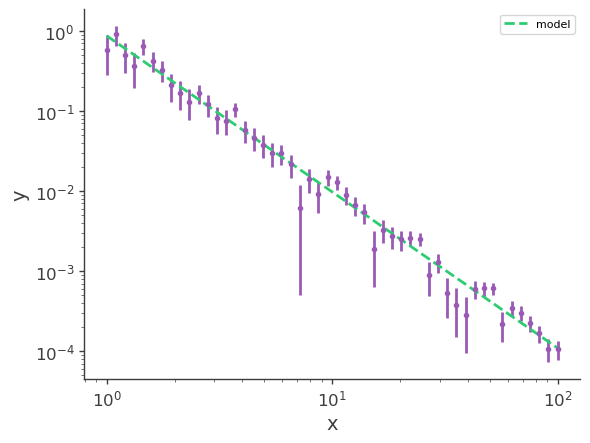

In [9]:
gen_function = Powerlaw()
x = np.logspace(0, 2, 50)

xyl_generator = XYLike.from_function(
    "sim_data", function=gen_function, x=x, yerr=0.3 * gen_function(x)
)
y = xyl_generator.y
y_err = xyl_generator.yerr

fit_function = Powerlaw()

xyl = XYLike("data", x, y, y_err)

parameters, like_values = xyl.fit(fit_function)

ig = xyl.plot(x_scale="log", y_scale="log")

In [10]:
gof, all_results, all_like_values = xyl.goodness_of_fit()

print("The null-hypothesis probability from simulations is %.2f" % gof["data"])

Goodness of fit computation:   0%|          | 0/1000 [00:00<?, ?it/s]

The null-hypothesis probability from simulations is 0.37


In [11]:
import scipy.stats

# Compute the number of degrees of freedom
n_dof = len(xyl.x) - len(fit_function.free_parameters)

# Get the observed value for chi2
# (the factor of 2 comes from the fact that the Gaussian log-likelihood is half of a chi2)
obs_chi2 = 2 * like_values["-log(likelihood)"]["data"]

theoretical_gof = scipy.stats.chi2(n_dof).sf(obs_chi2)

print("The null-hypothesis probability from theory is %.2f" % theoretical_gof)

The null-hypothesis probability from theory is 0.36


In [13]:
data_path = io.package_data.get_path_of_data_file("datasets/xy_powerlaw.txt")